In [1]:
#dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
#sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
#keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
#sets up Twitter API documentation and access
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
#telling twitter to search for desired handles
news_handles = ("@BBC", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

In [5]:
#creating spot to hold the values we need

media_outlet = []
tweet_time = []
tweet_text = []
comp_list = []
pos_list = []
neg_list = []
neutral_list = []
#added to make graph show how recent the tweet was tweeted
num_tweets_ago = []

#looping through the media outles
for source in news_handles:
    tweet_counter = -1
    
    #searching twitter for their tweets, where count = 100 (100 most recent tweets)
    public_tweets = api.search(source, count=150, result_type="recent")
    
    #loop through all of the tweets
    for tweet in public_tweets["statuses"]:
        
        tweet_counter = tweet_counter + 1
        media_outlet.append(source)
        sent_time = tweet["created_at"]
        tweet_time.append(sent_time)
        num_tweets_ago.append(tweet_counter)
                
        txt = tweet["text"]
        tweet_text.append(txt)
           
        # running sentiment analysis through Vader
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]

        # putting the sentiment scores into their corresponding arrays
        comp_list.append(compound)
        pos_list.append(pos)
        neg_list.append(neg)
        neutral_list.append(neu)

In [6]:
#creating df for the tweets using the dictionary method
tweet_df = pd.DataFrame({'Media Outlet' : media_outlet, 
                         'Time' : tweet_time, 
                         'Tweet Text' : tweet_text,
                         'Compound' : comp_list,
                         'Positive' : pos_list,
                         'Negative' : neg_list,
                         'Neutral' : neutral_list,
                        'Number of Tweets Ago' : num_tweets_ago})

#exporting df to a csv file
tweet_df.to_csv('news_mood.csv')
tweet_df.head()

,Compound,Media Outlet,Negative,Neutral,Number of Tweets Ago,Positive,Time,Tweet Text
0,-0.6249,@BBC,0.219,0.729,0,0.053,Sat Apr 21 23:29:53 +0000 2018,@bbc new radio webpage is horrid on just about...
1,0.0000,@BBC,0.000,1.000,1,0.000,Sat Apr 21 23:29:40 +0000 2018,RT @AWAKEALERT: Max Keiser quit @BBC because h...
2,-0.6523,@BBC,0.186,0.814,2,0.000,Sat Apr 21 23:29:31 +0000 2018,RT @OLOV1571: I thought kidnapping/euthanasia ...
3,0.0000,@BBC,0.000,1.000,3,0.000,Sat Apr 21 23:29:19 +0000 2018,@dpa @AFPress @reuters @bbc #Catalonia #Catalo...
4,-0.8221,@BBC,0.390,0.610,4,0.000,Sat Apr 21 23:29:16 +0000 2018,RT @JamesHeartfield: Look at these whining @BB...


In [7]:
#verify 100 tweets came in for each media outlet (only 94 came in from BBC, altered script to pull in more tweets from 100 to 150)
#not sure why one less tweet came in when pulling more tweets, but moving on
tweet_df['Media Outlet'].value_counts()

@CBSNews    100
@CNN        100
@nytimes    100
@FoxNews    100
@BBC         93
Name: Media Outlet, dtype: int64

In [8]:
#creating individual df for each media outlet using .loc
bbc = tweet_df.loc[tweet_df['Media Outlet'] == '@BBC',:]
fox = tweet_df.loc[tweet_df['Media Outlet'] == '@FoxNews',:]
nyt = tweet_df.loc[tweet_df['Media Outlet'] == '@nytimes',:]
cbs = tweet_df.loc[tweet_df['Media Outlet'] == '@CBSNews',:]
cnn = tweet_df.loc[tweet_df['Media Outlet'] == '@CNN',:]
cbs.head()


,Compound,Media Outlet,Negative,Neutral,Number of Tweets Ago,Positive,Time,Tweet Text
93,-0.1280,@CBSNews,0.185,0.662,0,0.152,Sat Apr 21 23:30:37 +0000 2018,@paulb0641 @CBSNews Trump lies all the time in...
94,-0.8720,@CBSNews,0.498,0.386,1,0.116,Sat Apr 21 23:30:36 +0000 2018,RT @CBSNews: India approves death penalty for ...
95,0.0000,@CBSNews,0.000,1.000,2,0.000,Sat Apr 21 23:30:23 +0000 2018,"@CBSNews YAY,!!"
96,0.4939,@CBSNews,0.000,0.878,3,0.122,Sat Apr 21 23:30:22 +0000 2018,RT @notprogressive1: @CBSNews And you wonder w...
97,-0.6696,@CBSNews,0.407,0.423,4,0.169,Sat Apr 21 23:30:15 +0000 2018,@CBSNews Add acid attacks and honor killings t...


In [9]:
#finding average of compound analysis for each media outlet to use on 2nd graph
bbc_comp = round((bbc["Compound"].mean()),2)
fox_comp = round((fox["Compound"].mean()),2)
nyt_comp = round((nyt["Compound"].mean()),2)
cbs_comp = round((cbs["Compound"].mean()),2)
cnn_comp = round((cnn["Compound"].mean()),2)

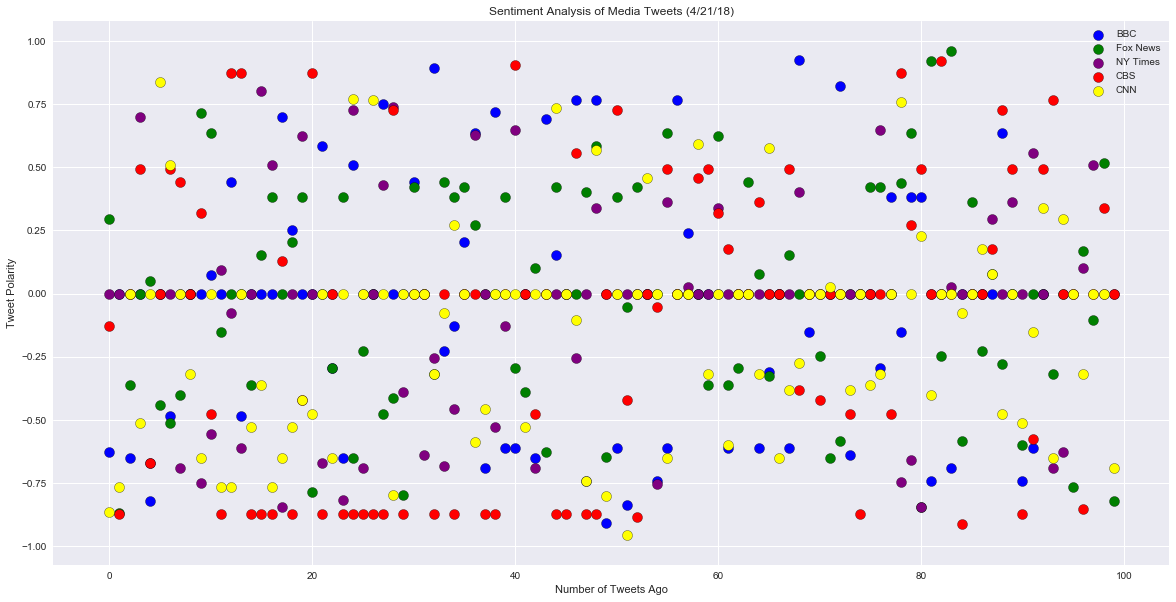

In [10]:
# scatter plot of each media outlets compound sentiment analysis
sns.set()
all_outlets = bbc.plot(kind = 'scatter', x = 'Number of Tweets Ago', y = 'Compound', s = 100, color = 'blue', edgecolors = 'black', 
                           figsize = (20,10), legend = True, label = 'BBC')

fox.plot(kind = 'scatter', x = 'Number of Tweets Ago', y = 'Compound', s = 100, color = 'green', edgecolors = 'black', 
                           figsize = (20,10), legend = True, label = 'Fox News', ax = all_outlets)

nyt.plot(kind = 'scatter', x = 'Number of Tweets Ago', y = 'Compound', s =100, color = 'purple', edgecolors = 'black', 
                           figsize = (20,10),  legend = True, label = 'NY Times', ax = all_outlets)

cbs.plot(kind = 'scatter', x = 'Number of Tweets Ago', y = 'Compound', s = 100, color = 'red', edgecolors = 'black', 
                           figsize = (20,10),legend = True, label = 'CBS', ax = all_outlets)  
                         
cnn.plot(kind = 'scatter', x = 'Number of Tweets Ago', y = 'Compound', s = 100, color = 'yellow', edgecolors = 'black', 
                          figsize = (20,10), legend = True, label = 'CNN', ax = all_outlets)
                         
plt.xlabel('Number of Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of Media Tweets (4/21/18)')
plt.grid(True)

plt.savefig("sentiment_analysis_scatter.png")
plt.show()

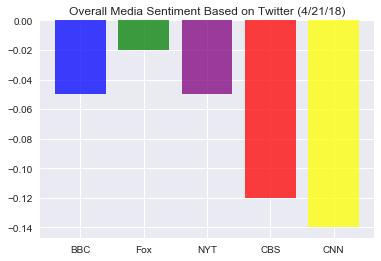

In [11]:
#bar chart
outlets = [bbc_comp, fox_comp, nyt_comp, cbs_comp, cnn_comp]
x_axis = np.arange(len(outlets))
plt.bar(x_axis, outlets, color=['blue', 'green', 'purple', 'red', 'yellow'], alpha=0.75, align="edge")
plt.title("Overall Media Sentiment Based on Twitter (4/21/18)")
tick_loc = [value+0.4 for value in x_axis]
plt.xticks(tick_loc, ["BBC", "Fox", "NYT", "CBS", "CNN"])
plt.savefig("bar_graph.png")
plt.show()